In [260]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from metpy.units import units
from metpy.constants import Rv, Rd
from metpy.calc import density, saturation_vapor_pressure, equivalent_potential_temperature
import pandas as pd

In [248]:
def huang_es(temp):
    """Calculates the SVP for water and ice using two different forumlas from Huang (2018). Uses T in Celcius, and returns Pascals"""
    es = np.zeros_like(temp)
    for i,T in enumerate(temp): #in deg C
        if T > 0:
            es[i] =  ((np.exp(34.494 - (4924.99/(T + 237.1))))/((T+105)**1.57)) ##for water
#             print('water')
        else: 
            es[i] =  ((np.exp(43.494 - (6545.8/(T + 278))))/((T+868)**2)) ##for ice
#             print('ice')
    return es * units.pascal
    

In [33]:
def bolton(T):
    """From Bolton (1980) uses temperature in deg C, also same formula that metpy uses, returns SVP in hectopascals"""
    es = 6.11*np.exp((17.67*T)/(T+243.3))
    return es *units.hectopascal

In [40]:
def sonntag(T): #in K
    """ From Sonntag 1994. Uses T in kelvin and returns SVP in hPa"""
    es = np.exp((-6096.9385/T) + 16.635794 - 2.7111938* (10**-2) * T + (1.673952* (10**-5) * T**2) + (2.433502 * np.log(T)))
    return es *units.hectopascal

In [249]:
def wexler(temp):
    """Uses the Hyland and Wexler(1983) forumulation for SVP with formulas for both water and ice. Uses T in kelvin and returns in pascals."""
    es = np.zeros_like(temp)
    for i,T in enumerate(temp):#   in deg k
        if T > 0:
            es[i] = np.exp(((-0.58002206* (10**4)) / T) + (0.13914993*(10**1)) - (0.48640239* (10**-1))*T + (0.41764768*(10**-4))* (T**2) - (0.14452093*(10**-7))* (T**3)+\
                         (0.65459673*(10**1)* np.log(T)))
        else: 
            es[i] =  np.exp(((-0.56745359* (10**4)) / T) + (0.63925247*(10**1)) - (0.96778430* (10**-2))*T + (0.62215701*(10**-6))* (T**2) + (0.20747825*(10**-8))* (T**3)-\
                            (0.94840240*(10**12) +(0.41635019*(10**1))* np.log(T)))
#             print('ice')
    return es * units.pascal

In [281]:
temp = np.arange(-101.00,101.00,1)
tempk = np.arange(172.15, 374.15,1)
print(temp[161])

60.0


In [251]:
###Find Saturation Vapor Pressures
es_huang = huang_es(temp).to(units.hectopascal)
es_bolton = bolton(temp)
es_sonntag = sonntag(tempk)
es_wexler = wexler(tempk).to(units.hectopascal)
es_metpy = saturation_vapor_pressure(temp*units.celsius).to(units.hectopascal)

In [255]:
###Find diff between metpy svp and other forumlations####
met_huang = es_metpy - es_huang
met_sonntag = es_metpy - es_sonntag
met_wexler = es_metpy - es_wexler


In [283]:
print(es_metpy[201],es_huang[201],es_sonntag[201],es_wexler[201])

1047.7065911001228 hectopascal 1014.1699487195771 hectopascal 1014.1873755889958 hectopascal 1014.1871682799164 hectopascal


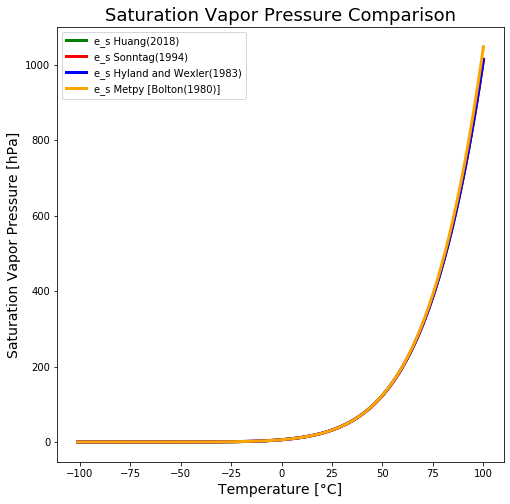

In [284]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(temp, es_huang.to(units.hectopascal), color = 'green',linestyle = '-', linewidth = 3, label='e_s Huang(2018)')
ax.plot(temp, es_sonntag, color = 'red',linestyle = '-', linewidth = 3, label='e_s Sonntag(1994)')
ax.plot(temp, es_wexler,color = 'blue',linestyle = '-', linewidth = 3, label='e_s Hyland and Wexler(1983)')
ax.plot(temp, es_metpy, color = 'orange',linestyle = '-', linewidth = 3,label='e_s Metpy [Bolton(1980)]')
ax.legend()
plt.title('Saturation Vapor Pressure Comparison', fontsize= 18)
ax.set_ylabel('Saturation Vapor Pressure [hPa]',fontsize = 14)
ax.set_xlabel('Temperature [\xb0C]',fontsize = 14)
plt.savefig('es_comp.png')

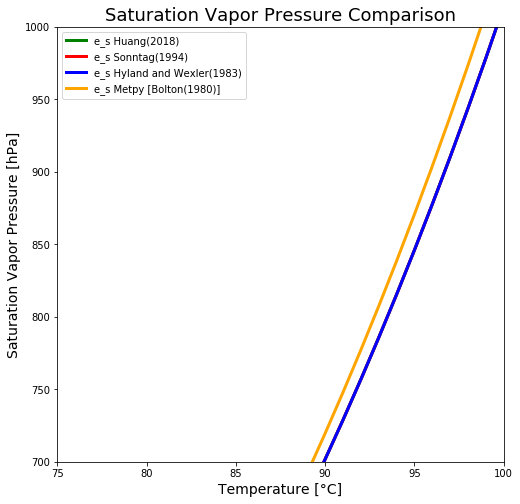

In [285]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(temp, es_huang.to(units.hectopascal), color = 'green',linestyle = '-', linewidth = 3, label='e_s Huang(2018)')
ax.plot(temp, es_sonntag, color = 'red',linestyle = '-', linewidth = 3, label='e_s Sonntag(1994)')
ax.plot(temp, es_wexler,color = 'blue',linestyle = '-', linewidth = 3, label='e_s Hyland and Wexler(1983)')
ax.plot(temp, es_metpy, color = 'orange',linestyle = '-', linewidth = 3,label='e_s Metpy [Bolton(1980)]')
ax.legend()
ax.set_ylim(700,1000)
ax.set_xlim(75,100)
plt.title('Saturation Vapor Pressure Comparison', fontsize= 18)
ax.set_ylabel('Saturation Vapor Pressure [hPa]',fontsize = 14)
ax.set_xlabel('Temperature [\xb0C]',fontsize = 14)
plt.savefig('es_comp_zoom.png')

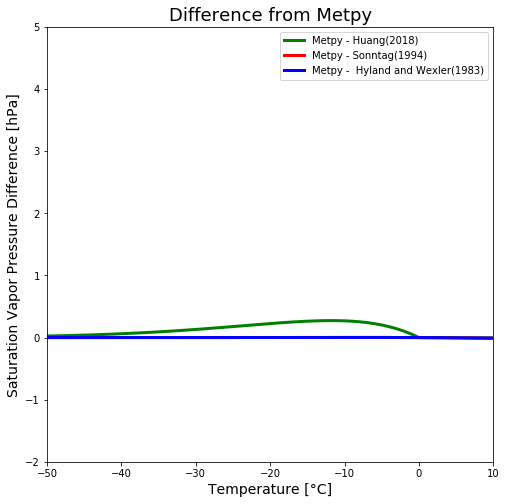

In [286]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(temp, met_huang, color = 'green',linestyle = '-', linewidth = 3, label='Metpy - Huang(2018)')
ax.plot(temp, met_sonntag, color = 'red',linestyle = '-', linewidth = 3, label='Metpy - Sonntag(1994)')
ax.plot(temp, met_wexler,color = 'blue',linestyle = '-', linewidth = 3, label='Metpy -  Hyland and Wexler(1983)')
ax.legend()
ax.set_ylim(-2,5)
ax.set_xlim(-50,10)
plt.title('Difference from Metpy', fontsize= 18)
ax.set_ylabel('Saturation Vapor Pressure Difference [hPa]',fontsize = 14)
ax.set_xlabel('Temperature [\xb0C]',fontsize = 14)
plt.savefig('es_diff_zoom.png')

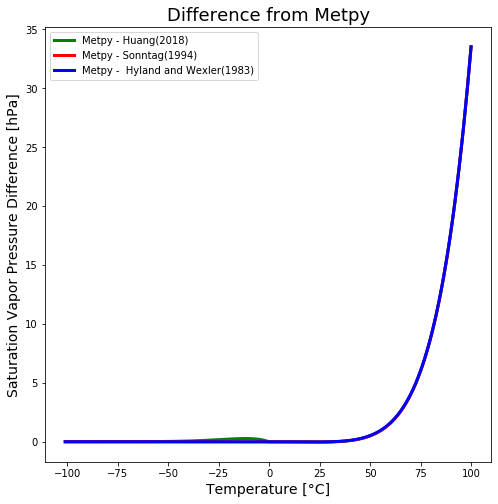

In [287]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(temp, met_huang, color = 'green',linestyle = '-', linewidth = 3, label='Metpy - Huang(2018)')
ax.plot(temp, met_sonntag, color = 'red',linestyle = '-', linewidth = 3, label='Metpy - Sonntag(1994)')
ax.plot(temp, met_wexler,color = 'blue',linestyle = '-', linewidth = 3, label='Metpy -  Hyland and Wexler(1983)')
ax.legend()
plt.title('Difference from Metpy', fontsize= 18)
ax.set_ylabel('Saturation Vapor Pressure Difference [hPa]',fontsize = 14)
ax.set_xlabel('Temperature [\xb0C]',fontsize = 14)
plt.savefig('es_diff.png')